In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import xgboost as xgb
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle


In [8]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values - 1

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)


In [13]:
# Define the model architecture
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=30)

# Train the model
_ = model.fit(X_train, y_train)

Test accuracy: 0.949
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       148
           1       0.97      0.95      0.96       156
           2       0.93      0.89      0.91       160
           3       0.93      0.95      0.94       164
           4       0.92      0.95      0.94       154
           5       0.99      0.98      0.99       163
           6       0.96      0.99      0.97       175

    accuracy                           0.95      1120
   macro avg       0.95      0.95      0.95      1120
weighted avg       0.95      0.95      0.95      1120



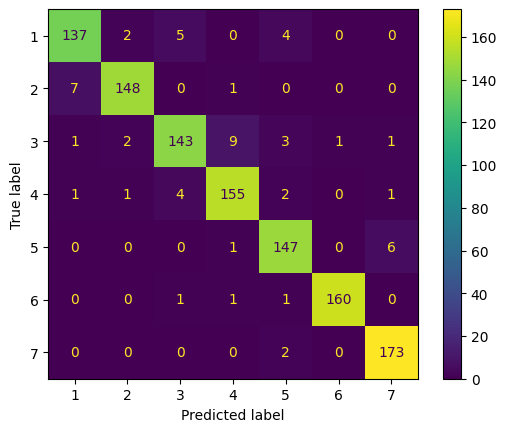

In [14]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

report = classification_report(y_test,y_pred)
print(report)

conf_mat = np.array(confusion_matrix(y_test, y_pred))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()

In [15]:
accuracies = []

for n_estimators in range(1, 100):
    model = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=n_estimators)

    # Train the model
    _ = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies += [n_estimators, accuracy],
    
accuracies = np.array(accuracies)

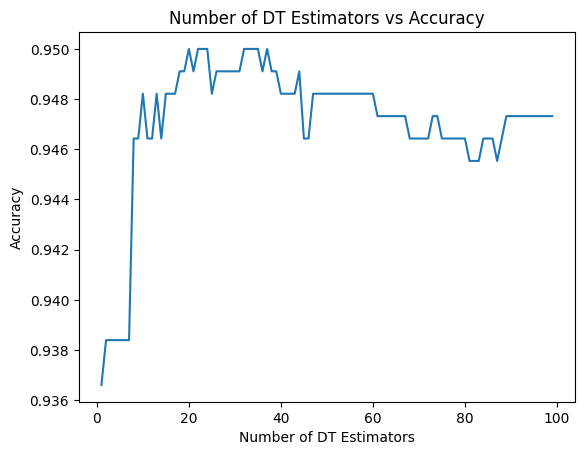

In [16]:
plt.title("Number of DT Estimators vs Accuracy")
plt.xlabel("Number of DT Estimators")
plt.ylabel("Accuracy")
plt.plot(*accuracies.T, label="Accuracy")
plt.show()


In [17]:
model_name = "xgboost"

pickle.dump(model,open(f"models/{model_name}.pickle","wb"))
model = pickle.load(open(f"models/{model_name}.pickle","rb"))